In [3]:
!pip3 install nltk
!pip3 install numpy

     |████████████████████████████████| 1.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 300 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 672 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 7.8 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=688b718c139207ba256f013985a576245a993e33b230f3b07dd45ffb894de5ab
  Stored in directory: /home/bor/.cache/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 14.5 MB 6.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this w

In [29]:
!pip3 install pandas

     |████████████████████████████████| 10.4 MB 8.6 MB/s eta 0:00:01


In [ ]:
!pip3 install matplotlib

In [4]:
import nltk
import numpy as np

In [5]:
with open('./mail_in.txt', 'r') as f:  # считываем текстовый файл
    inm = f.read()

In [6]:
inm[:1000] #insert(&head, item);

'Сегодня\nМосква, Россия (94.29.90.41) — текущее устройство\nПроверка почты 15:13браузер Firefox (Linux)\nВход в почту 15:13браузер Firefox (Linux)\n16 июня 2020\nМосква, Россия (94.232.137.20)\nПроверка почты 23:24 - 23:32браузер Opera (Windows 7)\n15 июня 2020\nМосква, Россия (91.76.74.254)\nПроверка почты 12:11браузер Yandex (Windows 7)\n12 июня 2020\nМосква, Россия (91.77.149.205)\nПроверка почты 08:08браузер Yandex (Windows 7)\nВход в почту 08:07браузер Yandex (Windows 7)\n9 июня 2020\nМосква, Россия (94.232.137.20)\nПроверка почты 10:35 - 23:49браузер Opera (Windows 7)\n6 писем перемещено из папки Входящие в папку Корзина 23:16браузер Opera (Windows 7)\nВход в почту 10:33браузер Opera (Windows 7)\nИзменен пароль 10:33браузер Opera (Windows 7)\nВосстановлен пароль 10:33браузер Opera (Windows 7)\n4 июня 2020\nМосква, Россия (46.138.154.238)\nПроверка почты 14:30браузер Yandex (Windows 7)\nВход в почту 14:29браузер Yandex (Windows 7)\nКурск, Курская область, Россия (94.25.166.144)\n

In [7]:
paragraphs = [sen for sen in inm.split('\n') if sen]  # разбиваем на параграфы
paragraphs[:5]

['Сегодня',
 'Москва, Россия (94.29.90.41) — текущее устройство',
 'Проверка почты 15:13браузер Firefox (Linux)',
 'Вход в почту 15:13браузер Firefox (Linux)',
 '16 июня 2020']

In [8]:
len(paragraphs)

620

In [9]:
#Хочу
stop1="IMAP";#удалить строки с этим
stop2="Проверка";#удалить строки с этим 
metk = '?'#разделить слитые слова с этим


ind_s1=[token.rfind(stop1) for token in paragraphs];#индекс по stop1
a=len(paragraphs);
[paragraphs.pop(a-i) for i in range(a) if ind_s1[-i]!=-1]#удаляю !функция pop с индексами строк работает в обратном порядке поскольку уменьшается длина массива


ind_s2=[token.rfind(stop2) for token in paragraphs];
a=len(paragraphs);
[paragraphs.pop(a-i) for i in range(a) if ind_s2[-i]!=-1];#удаляю по stop2


#paragraphs.pop(paragraphs.index(token));
print(ind_s1[0:15],"\n",ind_s2[0:15],"\n",len(paragraphs))        

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] 
 [-1, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1] 
 303


In [10]:
paragraphs[:10]

['Сегодня',
 'Москва, Россия (94.29.90.41) — текущее устройство',
 'Вход в почту 15:13браузер Firefox (Linux)',
 '16 июня 2020',
 'Москва, Россия (94.232.137.20)',
 '15 июня 2020',
 'Москва, Россия (91.76.74.254)',
 '12 июня 2020',
 'Москва, Россия (91.77.149.205)',
 'Вход в почту 08:07браузер Yandex (Windows 7)']

In [11]:
import numpy as np

#Переведём список paragraphs в массив numpy/Этот пример для больших данных
#m=np.array(paragraphs) #- проще и быстрее так
from time import time
from tempfile import TemporaryFile 
 
tic = time()

outfile = TemporaryFile()
np.save(outfile, paragraphs)

outfile.seek(0)
m=np.load(outfile)
m.dtype

toc = time()

print(id(m)," ",id(paragraphs)," время преобразования:", toc - tic)# m и paragraphs ссылаются на разный список



In [12]:
from time import time

tic = time()
m=np.array(paragraphs) #- проще так

toc = time()

print(id(m)," ",id(paragraphs)," время преобразования:", toc - tic)# m и paragraphs ссылаются на разный список


140171298037072   140170401298624  время преобразования: 0.0005550384521484375


In [13]:
m.size # всего предложений в данных

303

In [14]:
#создадим массив с IP
i_ip=[s.count(".")==3 for s in m];#логический индекс IP
ip = [m[i_ip][i][m[i_ip][i].index('.')-3:m[i_ip][i].index('.')+13] for i in range(m[i_ip].size)]

#{ip1: [i for i in st if (i!='.')&(i!=')')] for ip1,*st in ip}
#удалим лишние символы
snak=['(',')',' ']
#ip=[ip.split('.') for ip in ip]
ip = [[bukva for bukva in ipb if bukva not in snak] for ipb in ip]
ip = [''.join(ip) for ip in ip]
ip=np.array(ip)
ip.size

158

In [15]:
#Определим индекс дат
i_d=[s.count('')<22 for s in m];#логический индекс дат

#переведём из логического в числовой формат
i=np.arange(m.shape[0])
i_d=i[i_d] #индекс дат числовой
m[i_d][:3]

array(['Сегодня', '16 июня 2020', '15 июня 2020'], dtype='<U98')

In [16]:
#Функция преобразования дат
import datetime

def mytime(m):
    dm=[]
    
    def mytime1(d):
        d=d.split(' ')
        today = datetime.datetime.today()
        yesterday=today+ datetime.timedelta(days=1)
        #f=[today.year,today.month,today.day]
        today=str(today).split(' ')[0]
        yesterday=str(today).split(' ')[0]
        inp=['января','февраля','марта','апреля','мая','июня','июля','августа','сентября','октября','ноября','декабря'];
        ex=['01','02','03','04','05','06','07','08','09','10','11','12'];
        if len(d)>2:
            i=inp.index(d[1])
            d[1]=ex[i]
            d=d[::-1]
            d=[d[0],d[1],d[2]]
            d='-'.join(d)
        elif d==['Сегодня']:
            d=today     
        elif d==['Вчера']:
            d=yesterday               
        else: 
            d=d
        return d
    for i in m:    
        dm.append(mytime1(i)) 
    dm=np.array(dm);
    return dm
#m=mytime(m[i_d]), - m[i_d] - массив с датами входного списка
#m

In [17]:
m[i_d]=mytime(m[i_d])
print(m[i_d])

['2020-09-06' '2020-06-16' '2020-06-15' '2020-06-12' '2020-06-9'
 '2020-06-4' '2020-06-3' '2020-06-2' '2020-06-1' '2020-05-31' '2020-05-30'
 '2020-05-29' '2020-05-28' '2020-05-27' '2020-05-26' '2020-05-25'
 '2020-05-24' '2020-05-23' '2020-05-22' '2020-05-21' '2020-05-20'
 '2020-05-19' '2020-05-18' '2020-05-17' '2020-05-15' '2020-05-14'
 '2020-05-12' '2020-05-11' '2020-05-9' '2020-05-8' '2020-05-7' '2020-05-6'
 '2020-05-4' '2020-05-3' '2020-04-28' '2020-04-25' '2020-04-20'
 '2020-04-19' '2020-04-18' '2020-04-17' '2020-04-15' '2020-04-13'
 '2020-04-9' '2020-04-8' '2020-04-7' '2020-04-5' '2020-04-4' '2020-04-3'
 '2020-04-1' '2020-03-31' '2020-03-29' '2020-03-26' '2020-03-25'
 '2020-03-24' '2020-03-23' '2020-03-22' '2020-03-21' '2020-03-22'
 '2020-03-20' '2020-03-19' '2020-03-18' '2020-03-17' '2020-03-16'
 '2020-03-15' '2020-03-14' '2020-03-13' '2020-03-12' '2020-03-10'
 '2020-03-9' '2020-03-8' '2020-03-6' '2020-03-5' '2020-03-4']


In [18]:
#создадим массив с датами
#t=np.zeros(m.shape[0])
#ta=[[m[ind] for i in range(len(m)-ind)] for ind in i_d]
t=[]
j=0;
    
for i in range(len(i_d)-1):#заполняем до последней даты
    while j<i_d[i+1]:
        t.append(m[i_d[i]])        
        j=j+1
        
[t.append(m[i_d[-1]]) for i in range(len(m)-i_d[-1])]    #заполняем после последней даты  
#преобразуем в объект numpy
t=np.array(t);
#[print(m[i],"\t",t[i]) for i in range(m.size)]
t.size

303

In [22]:
def munique(ip):
    #напишем функцию перебора списка
    k=ip.size

    n=np.zeros([k], dtype='int')# - число вхождений элементов
    n_u1=[]# - индекс уникального элемента по последнему вхождению в список
    n_u2=[]# - индекс уникального элемента по последнему вхождению в список

    for i in range(k):
        l=(ip[i+1:]==ip[i])
        l2=(ip==ip[i])
        l1=(ip[i+1:]==ip[i])*1  
        n[i+1:]=n[i+1:]+l1

        if n[i]==0:
            n_u1.append(i) #первое вхождение        
            if np.sum(np.where(l==True))!=0:
                n_u2.append(np.max(np.where(l2==1))) #последнее вхождение
            else: 
                n_u2.append(i)

    n=[sum(ip==ip[i]) for i in range(k)]#число вхождений
    n=np.array(n, dtype='int')
    n_u1=np.array(n_u1, dtype='int')
    n_u2=np.array(n_u2, dtype='int')
    n=n[n_u1]
    
    return n,n_u1,n_u2

#s=munique(ip)
#s[1]-индекс первого уникального элемента, 
#s[2]-индекс последнего вхождения уникального элемента
#s[0] - количество вхождений уникальных элементов

In [19]:
m.size


303

In [23]:
tic = time()

s=munique(ip)

toc = time()

print(ip[s[1]],"время нахождения уникальных элементов:", toc - tic)

['94.29.90.41—' '94.232.137.20' '91.76.74.254' '91.77.149.205'
 '46.138.154.238' '94.25.166.144' '95.108.244.149' '213.87.136.226'
 '46.138.158.98' '213.87.144.69' '91.77.55.12' '79.139.215.51'
 '213.87.159.239' '46.138.135.229' '79.139.213.86' '213.87.160.250'
 '46.138.144.164' '77.88.29.97' '91.78.229.83' '77.88.29.4' '77.88.29.2'
 '213.87.160.238' '46.138.171.42' '79.139.223.118' '213.87.150.132'
 '213.87.138.223' '213.87.138.129' '37.230.157.29' '46.138.139.219'
 '46.138.174.141' '79.139.214.180' '213.87.139.157' '213.87.145.142'
 '46.138.148.82' '213.87.147.64' '213.87.146.50' '213.87.157.187'
 '213.87.130.15' '213.87.150.99' '213.87.138.33' '46.138.157.202'
 '91.76.78.193' '91.76.116.111' '213.87.161.242' '46.138.146.207'
 '213.87.131.219' '213.87.135.205' '213.87.131.28' '213.87.135.180'
 '213.87.139.35' '213.87.155.9' '213.87.144.222' '213.87.135.121'
 '213.87.148.222' '213.87.160.143' '213.87.130.45' '213.87.161.1'
 '213.87.149.177' '213.87.146.3' '213.87.146.87' '213.87.159.2

In [30]:
#Таблица IP: даты входа
k=ip.size
g= { ip[i]: [t[np.where((ip==ip[i])==True)]] for i in range(k)}

#Массив дат входа по индексу IP
g1= [t[np.where((ip==ip[i])==True)] for i in range(k)] #даты входа c IP
g1=np.array(g1)

<ipython-input-30-dc279b52878f>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  g1=np.array(g1)


In [31]:
#Переведём индекс уникальных элементов в индекс выборки
i=np.arange(m.shape[0])
a_i=i[i_ip] #индекс IP числовой
m[a_i][s[1]]#.nonzero()
i_s=a_i[s[1]]# - индекс уникальных IP в исходном массиве
m[i_s][:3]

array(['Москва, Россия (94.29.90.41) — текущее устройство',
       'Москва, Россия (94.232.137.20)', 'Москва, Россия (91.76.74.254)'],
      dtype='<U98')

In [32]:
#Найдём вхождения в даты уникальных IP
t[i_s]

array(['2020-09-06', '2020-06-16', '2020-06-15', '2020-06-12',
       '2020-06-4', '2020-06-4', '2020-06-4', '2020-06-4', '2020-06-3',
       '2020-06-3', '2020-06-2', '2020-05-27', '2020-05-27', '2020-05-26',
       '2020-05-23', '2020-05-21', '2020-05-19', '2020-05-18',
       '2020-05-18', '2020-05-18', '2020-05-18', '2020-05-18',
       '2020-05-17', '2020-05-15', '2020-05-15', '2020-05-14',
       '2020-05-12', '2020-05-11', '2020-05-9', '2020-05-7', '2020-05-7',
       '2020-05-6', '2020-05-4', '2020-05-3', '2020-04-28', '2020-04-25',
       '2020-04-25', '2020-04-25', '2020-04-20', '2020-04-18',
       '2020-04-13', '2020-04-9', '2020-04-8', '2020-04-8', '2020-04-7',
       '2020-04-4', '2020-04-1', '2020-03-31', '2020-03-29', '2020-03-26',
       '2020-03-26', '2020-03-26', '2020-03-25', '2020-03-25',
       '2020-03-24', '2020-03-24', '2020-03-24', '2020-03-24',
       '2020-03-23', '2020-03-19', '2020-03-18', '2020-03-18',
       '2020-03-17', '2020-03-16', '2020-03-15', '202

In [33]:
#Создание таблицы https://smysl.io/blog/pandas/

tab = {
    'IP': ip[s[1]],
    'колличество': s[0],
    'последний': t[s[1]],
    'первый': t[s[2]],
    'meta':     m[i_s],
    'meta_d': g1[s[1]]
    
}

In [34]:
import pandas as pd
dat = pd.DataFrame(data=tab)

In [35]:
dat.to_csv('анализ.csv')
dat = pd.read_csv('анализ.csv', index_col='последний', parse_dates=True)

In [36]:
#dat.последний=pd.to_datetime(dat.последний)
dat.первый=pd.to_datetime(dat.первый)
dat.sort_values(['последний','IP']).head()

,Unnamed: 0,IP,колличество,первый,meta,meta_d
последний,,,,,,
2020-04-19,72,213.87.157.179,1,2020-04-19,"Москва, Россия (213.87.157.179)",['2020-04-19']
2020-04-19,71,37.230.157.22,1,2020-04-19,"Москва, Россия (37.230.157.22)",['2020-04-19']
2020-04-20,70,213.87.146.70,1,2020-04-20,"Москва, Россия (213.87.146.70)",['2020-04-20']
2020-04-25,69,213.87.162.221,1,2020-04-25,"Москва, Россия (213.87.162.221)",['2020-04-25']
2020-04-25,68,213.87.162.56,1,2020-04-25,"Москва, Россия (213.87.162.56)",['2020-04-25']


In [37]:
dat.to_csv('анализ.csv')
#dat.to_excel("анализ.xlsx",sheet_name='Sheet_name_1') 

In [38]:
p=dat.groupby(dat.index.day_name())['IP'].count()  #число дней выборки на день недели
p

последний
Friday        5
Monday       12
Saturday     10
Sunday       11
Thursday      7
Tuesday      20
Wednesday     8
Name: IP, dtype: int64

In [39]:
import matplotlib.pyplot as plt
p.plot(figsize=(15, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)
plt.xticks(rotation=0,fontsize=10)

ModuleNotFoundError: No module named 'matplotlib'

In [29]:
#Группировка по столбцу и подсчёт числа записей в группах
dat.groupby(['последний'])['IP'].count() #.count(), .sum(), .median, .min(), .max()

последний
2020-04-19    2
2020-04-20    1
2020-04-25    2
2020-04-28    1
2020-05-03    2
2020-05-06    1
2020-05-07    2
2020-05-11    1
2020-05-12    2
2020-05-15    1
2020-05-17    2
2020-05-18    6
2020-05-19    6
2020-05-20    4
2020-05-21    3
2020-05-22    2
2020-05-23    7
2020-05-24    2
2020-05-25    2
2020-05-26    7
2020-05-27    2
2020-05-30    1
2020-06-02    1
2020-06-03    1
2020-06-04    2
2020-06-09    2
2020-06-12    2
2020-06-15    2
2020-06-16    1
2020-06-18    3
Name: IP, dtype: int64

(array([737537., 737546., 737553., 737560., 737567., 737577., 737584.,
        737591.]),
 <a list of 8 Text xticklabel objects>)

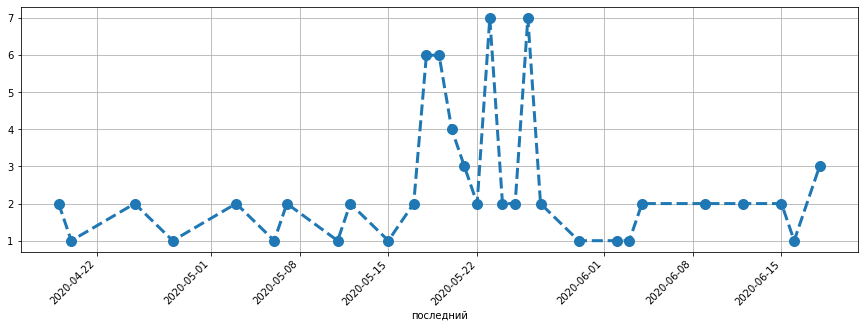

In [30]:
dat.groupby(['последний'])['IP'].count().plot(figsize=(15, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)
plt.xticks(rotation=45,fontsize=10)

In [31]:
#Группировка по столбцам и подсчёт числа "колличество" в группах
dat.groupby(['последний','IP'])['колличество'].count() #.count(), .sum(), .median, .min(), .max()

последний   IP            
2020-04-19  213.87.157.179    1
            37.230.157.22     1
2020-04-20  213.87.146.70     1
2020-04-25  213.87.162.221    1
            213.87.162.56     1
                             ..
2020-06-15  94.25.166.144     1
2020-06-16  91.77.149.205     1
2020-06-18  91.76.74.254      1
            94.232.137.20     1
            94.29.90.41—      1
Name: колличество, Length: 73, dtype: int64

In [32]:
dat.index #начальный и последний номер индекса: dat.index.start = 0 / dat.index.stop  =29
dat.columns #число строк
dat.dtypes #типы столбцов
dat.shape #форма таблицы
#dat.drop_duplicates().shape - удаление дубликатов

(73, 6)

In [33]:
#подсчёты по столбцам с условием
dat.колличество[dat.колличество<31].mean() #.count(), .sum(), .median, .min(), .max()

1.75

In [34]:
dat.IP.rank() # индексы IP по возрастанию

последний
2020-06-18    72.0
2020-06-18    70.0
2020-06-18    65.0
2020-06-16    67.0
2020-06-15    52.0
              ... 
2020-04-25    44.0
2020-04-25    43.0
2020-04-20    22.0
2020-04-19    45.0
2020-04-19    33.0
Name: IP, Length: 73, dtype: float64

In [35]:
#переворачивание таблицы и описание её
dat.describe(include=['object']).T

,count,unique,top,freq
IP,73,73,213.87.145.142,1
meta,73,73,"Москва, Россия (213.87.146.87)",1
meta_d,73,41,['2020-05-26'],7


In [36]:
#переворачивание столбца и описание его
dat.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,73.0,36.000000,21.217131,0.0,18.0,36.0,54.0,72.0
колличество,73.0,2.164384,4.615835,1.0,1.0,1.0,1.0,32.0


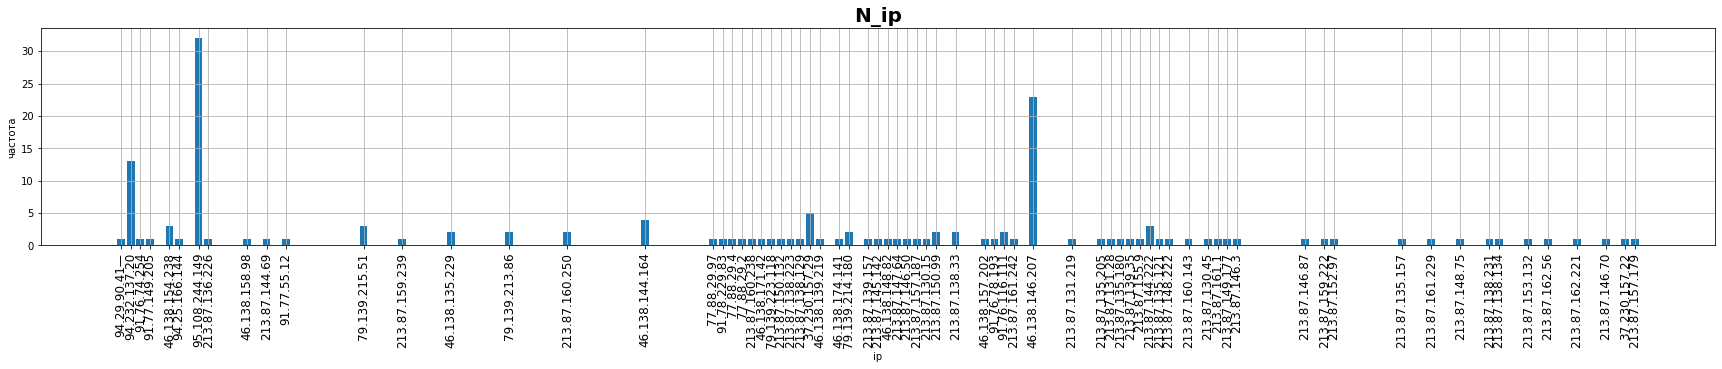

In [37]:
plt.figure(figsize=(30, 4))

plt.title('N_ip', fontweight='bold',  fontsize=20)
plt.xlabel('ip')
plt.ylabel('частота')

#plt.hist2d(s[1],s[3])#https://matplotlib.org/3.1.1/gallery/index.html
n_bins = 20
#plt.hist(s[0], bins=n_bins)
plt.bar(s[1],s[0])
plt.xticks(s[1],ip[s[1]],rotation=90,fontsize=12);#https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text
plt.grid(True)
plt.show()


Предобработка текста
